# Week 4 handin

# Exercise for the 4th course week

Use only numpy (not pandas) in these exercises
#### Exercise 1
1. Open the file './data/befkbhalderstatkode.csv'
2. Turn the csv file into a numpy ndarray with `np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)`
3. Using this data:
```python
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}
```
Find out how many people lived in each of the 11 areas in 2015
4. Make a bar plot to show the size of each city area from the smallest to the largest
5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
6. How many of those were from the other nordic countries (not dk)
7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015




## 02 Status
I did all mandatory exericeses.


## 03 Solution part 1

In [21]:
#1.1 and 1.2
import numpy as np

def readFromFile(fileName):
    arr = np.genfromtxt(fileName, delimiter=',', dtype=np.uint, skip_header=1)
    return arr
arr = readFromFile("../data/befkbhalderstatkode.csv")

<IPython.core.display.Javascript object>


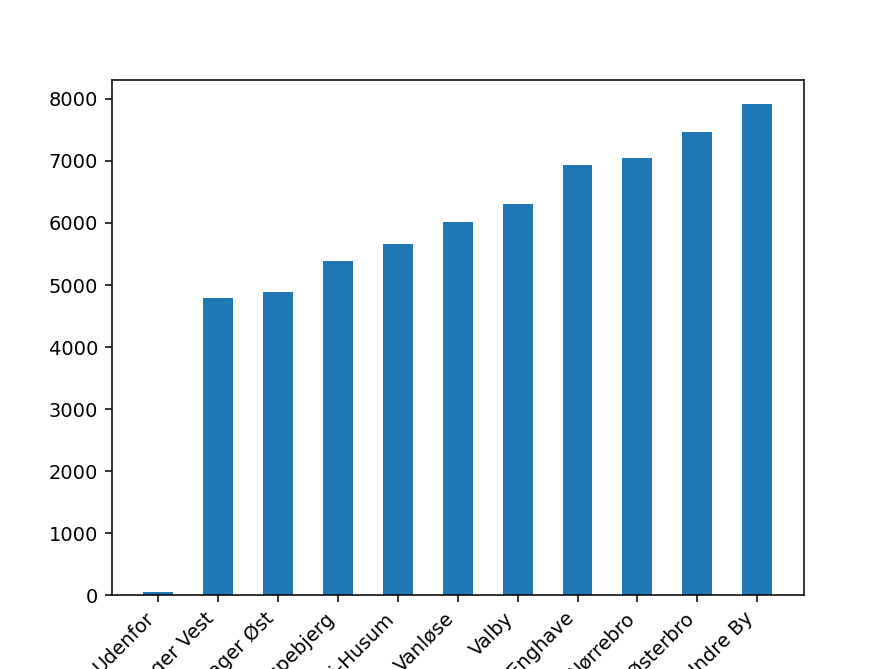

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

In [36]:
#1.3 & 1.4
%matplotlib notebook
import matplotlib.pyplot as plt

keys = ['Udenfor', 'Amager Vest', 'Amager Øst', 'Bispebjerg', 'Brønshøj-Husum', 'Vanløse', 'Valby', 'Vesterbro/Kgs. Enghave', 'Nørrebro', 'Østerbro', 'Indre By']
values = [58, 4797, 4894, 5385, 5666, 6022, 6299, 6934, 7053, 7462, 7914]

plt.bar(keys,values,width=0.5, align='center')
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')

In [38]:
#1.5

def peopleAbove65InCPH(arr):

    newMask = ((arr[:,0] == 2015) & (arr[:,2] >= 65))

    peopleAbove65 = np.sum(arr[newMask][:,4])

    return peopleAbove65
print(peopleAbove65InCPH(arr))


59859


In [39]:
#1.6 

def peopleAbove65FromNonDk(arr):

    newMask = ((arr[:,0] == 2015) & (arr[:,2] >= 65) & (arr[:,3] != 5100))

    amountOfPeople = np.sum(arr[newMask][:,4])

    return amountOfPeople
print(peopleAbove65FromNonDk(arr))

3787


<IPython.core.display.Javascript object>


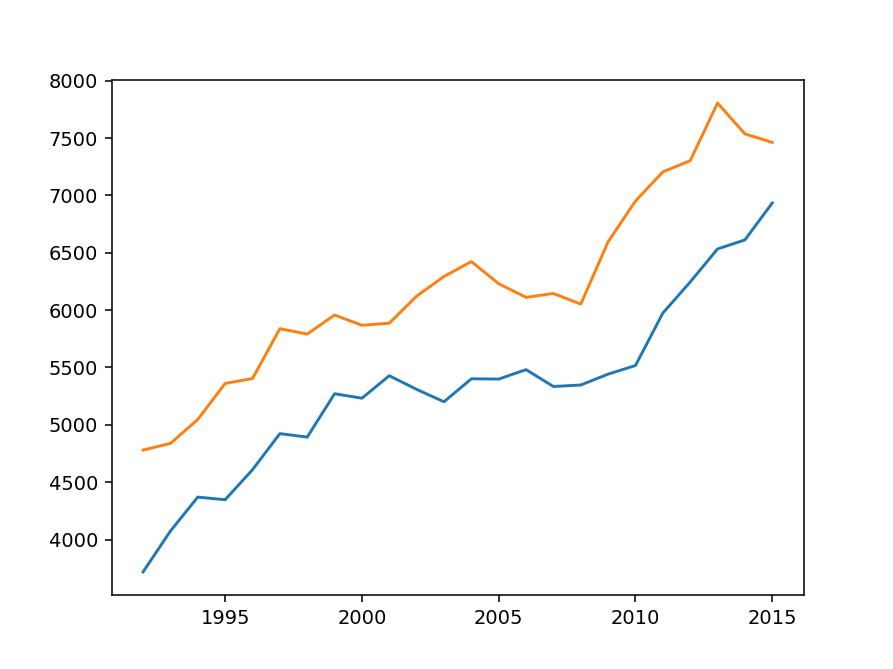

In [35]:
#1.7
%matplotlib notebook
import matplotlib.pyplot as plt
def showChanges(arr):
    vesterbro = {}
    osterbro = {}

    for i in range(1992, 2016):
        newMask = ((arr[:,0] == i) & (arr[:,2] == 2))
        osterbro[i] = np.sum(arr[newMask][:,4])

    for k in range(1992, 2016):
        newMask = ((arr[:,0] == k) & (arr[:,2] == 4))
        vesterbro[k] = np.sum(arr[newMask][:,4])
        
    return [vesterbro, osterbro]

changes = showChanges(arr)

vesterbro = list(changes[0].values())
osterbro = list(changes[1].values())

plt.plot(list(range(1992,2016)),vesterbro)
plt.plot(list(range(1992,2016)),osterbro)
